# Performing Data Pre-Processing on training dataset
- Steps:
    1. Removing null values and duplicate rows
    2. Removing user names from tweets
    3. Removal of Stop Words
    4. Stemming

In [1]:
import numpy as np
import re
import pandas as pd
import tensorflow as tf
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv('tweets.csv')
df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [3]:
# Total number of rows and columns in the dataset
df.shape

(31962, 3)

In [4]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [5]:
# Checking for null / empty values

has_missing_values = df.isnull().any().any()
if has_missing_values:
    print("The dataframe contains missing values.")
else:
    print("The dataframe does not contain any missing value.")

The dataframe does not contain any missing value.


In [6]:
# Removing null/empty values 
df = df.dropna(how='all')

In [7]:
# Remove duplicate rows
df = df.drop_duplicates()
df.shape

(31962, 3)

In [8]:
# This method counts the number of occurrences of each unique value in the 'label' column
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

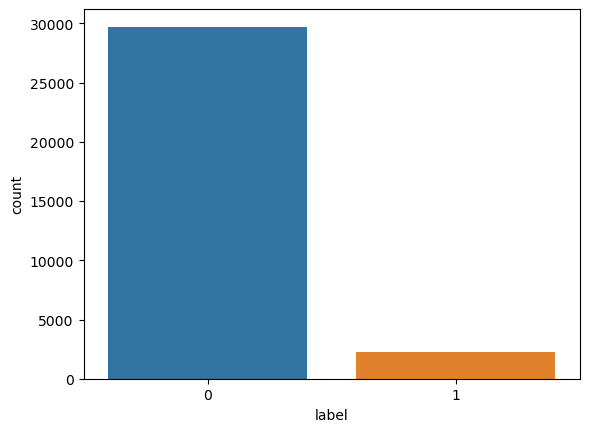

In [9]:
# Checking number of hate and non hate tweets
import seaborn as sns
sns.countplot(x = 'label',data = df)

# label 1 -> hate tweets
# Label 0 -> not hate tweets

In [10]:
# Removing unwanted 'id' column
del df['id']
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [11]:
# Removing usernames from tweets using Regex
def keep_text(tweet_text, pattern):
    matching_txt = re.findall(pattern, tweet_text)
    for word in matching_txt:
        tweet_text = re.sub(word, "",tweet_text)
    return tweet_text

df['cleaned_tweet_text'] = np.vectorize(keep_text)(df['tweet'],"@[\w]*")

In [12]:
# Displaying Cleaned tweets
df

,label,tweet,cleaned_tweet_text
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


In [13]:
# Keeping tweet text along with hashtags by removing other special characters
df["cleaned_tweet_text"] = df["cleaned_tweet_text"].str.replace("[^#a-zA-Z]", " ")
df

C:\Users\shahk\AppData\Local\Temp\ipykernel_25580\3813871458.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["cleaned_tweet_text"] = df["cleaned_tweet_text"].str.replace("[^#a-zA-Z]", " ")


,label,tweet,cleaned_tweet_text
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...
31958,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised in in #calgary #wso...


In [14]:
# Removing stopwords from tweets

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words=stopwords.words('english')

df["cleaned_tweet_text"] = df["cleaned_tweet_text"].apply(lambda tweet : " ".join([word for word in tweet.split() if (word not in stop_words)]))
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shahk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,tweet,cleaned_tweet_text
0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit use cause offer wheelchair...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,#model love u take u time ur
4,0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,ate isz youuu
31958,0,to see nina turner on the airwaves trying to...,see nina turner airwaves trying wrap mantle ge...
31959,0,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw work sad
31960,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised #calgary #wso condemn...


In [15]:
# Stemming the words

tokenized_tweet = df['cleaned_tweet_text'].apply(lambda tweet: tweet.split())

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda tweet: [stemmer.stem(word) for word in tweet])

# combine words into a tweet
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['cleaned_tweet_text'] = tokenized_tweet
df

,label,tweet,cleaned_tweet_text
0,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit use caus offer wheelchair v...
2,0,bihday your majesty,bihday majesti
3,0,#model i love u take with u all the time in ...,#model love u take u time ur
4,0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,ate isz youuu
31958,0,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...
31959,0,listening to sad songs on a monday morning otw...,listen sad song monday morn otw work sad
31960,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #templ vandalis #calgari #wso condemn act


# Performing LSTM Model on the extracted dataset

In [16]:
# Divide the df for training, validation and testing

train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
validate_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['label'])

In [17]:
print('### Train Data ###')
print(train_df['label'].value_counts())
print(len(train_df))
print('\n')

print('### Validate Data ###')
print(validate_df['label'].value_counts())
print(len(validate_df))
print('\n')

print('### Test Data ###')
print(test_df['label'].value_counts())
print(len(test_df))

### Train Data ###
0    23775
1     1794
Name: label, dtype: int64
25569


### Validate Data ###
0    2972
1     224
Name: label, dtype: int64
3196


### Test Data ###
0    2973
1     224
Name: label, dtype: int64
3197


In [18]:
X_train = train_df['cleaned_tweet_text'].astype(str).tolist()
X_valid = validate_df['cleaned_tweet_text'].astype(str).tolist()
X_test = test_df['cleaned_tweet_text'].astype(str).tolist()

y_train = train_df['label'].values  # 'label' is my target column
y_valid = validate_df['label'].values
y_test = test_df['label'].values

num_words = 50000
tokenizer = Tokenizer(num_words=num_words, oov_token="unk")
tokenizer.fit_on_texts(X_train)

# Tokenize and pad sequences without converting to np.array(dtype=object)
x_train = tokenizer.texts_to_sequences(X_train)
x_valid = tokenizer.texts_to_sequences(X_valid)
x_test = tokenizer.texts_to_sequences(X_test)

# Padding
maxlen = 50
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_valid = pad_sequences(x_valid, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

print('Train data len:', len(x_train))
print('Class distribution:', Counter(y_train))

print('Validation data len:', len(x_valid))
print('Class distribution:', Counter(y_valid))

print('Test data len:', len(x_test))
print('Class distribution:', Counter(y_test))

# TensorFlow dataset preparation
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

Train data len: 25569
Class distribution: Counter({0: 23775, 1: 1794})
Validation data len: 3196
Class distribution: Counter({0: 2972, 1: 224})
Test data len: 3197
Class distribution: Counter({0: 2973, 1: 224})


In [19]:
# Printing the vectorized tweets

def print_vectors(dataset, dataset_name):
    print(f'===== {dataset_name} dataset =====')
    for value, label in dataset.take(1):
        print(value, label)
        print('\n')

print_vectors(train_ds, "Train")
print_vectors(valid_ds, "Validation")
print_vectors(test_ds, "Test")

===== Train dataset =====
tf.Tensor(
[ 56 341 251 120   5 301 869 692   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int64)


===== Validation dataset =====
tf.Tensor(
[5873   54    4   20    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int64)


===== Test dataset =====
tf.Tensor(
[ 7198  4140  7198 15496     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
    

# Defining LSTM Model's architecture

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, BatchNormalization

num_words = 5000 # Number of words to consider as max. features
embedding_dim = 128  # Dimension of the embedding vector
maxlen = 50

model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim),
    SpatialDropout1D(0.3),
    BatchNormalization(),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

batch_size = 32
train_ds_batched = train_ds.batch(batch_size)
valid_ds_batched = valid_ds.batch(batch_size)

ans = model.fit(train_ds_batched.shuffle(5000),
                    epochs=10,
                    verbose=2,
                    validation_data=valid_ds_batched)

Epoch 1/10
800/800 - 29s - 36ms/step - accuracy: 0.9290 - loss: 0.2588 - val_accuracy: 0.9299 - val_loss: 0.2538
Epoch 2/10
800/800 - 24s - 30ms/step - accuracy: 0.9298 - loss: 0.2546 - val_accuracy: 0.9299 - val_loss: 0.2552
Epoch 3/10
800/800 - 24s - 30ms/step - accuracy: 0.9298 - loss: 0.2535 - val_accuracy: 0.9299 - val_loss: 0.2540
Epoch 4/10
800/800 - 25s - 31ms/step - accuracy: 0.9298 - loss: 0.2511 - val_accuracy: 0.9299 - val_loss: 0.2541
Epoch 5/10
800/800 - 24s - 30ms/step - accuracy: 0.9298 - loss: 0.2459 - val_accuracy: 0.9299 - val_loss: 0.2545
Epoch 6/10
800/800 - 24s - 30ms/step - accuracy: 0.9298 - loss: 0.2431 - val_accuracy: 0.9299 - val_loss: 0.2538
Epoch 7/10
800/800 - 24s - 30ms/step - accuracy: 0.9298 - loss: 0.2418 - val_accuracy: 0.9299 - val_loss: 0.2557
Epoch 8/10
800/800 - 24s - 30ms/step - accuracy: 0.9298 - loss: 0.2405 - val_accuracy: 0.9299 - val_loss: 0.2548
Epoch 9/10
800/800 - 24s - 30ms/step - accuracy: 0.9298 - loss: 0.2396 - val_accuracy: 0.9299 - 

# Measuring LSTM model's accuracy

In [21]:
test_ds_batched = test_ds.batch(batch_size)
test_loss, test_acc = model.evaluate(test_ds_batched, verbose=2)

print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')
print('---------------------------')
print("Percentage values:")
print(f'Test accuracy: {test_acc * 100:.2f} %')
print(f'Test loss: {test_loss * 100:.2f} %')

100/100 - 1s - 12ms/step - accuracy: 0.9299 - loss: 0.2539
Test accuracy: 0.9299343228340149, Test loss: 0.2538975179195404
---------------------------
Percentage values:
Test accuracy: 92.99 %
Test loss: 25.39 %


In [22]:
# Command to save the model for future use 

model.save('./Model/ML_model.keras')

# ROC Curve Calculation

In [23]:
val_predictions = model.predict(x_valid)

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


In [24]:
from sklearn.metrics import roc_curve
import numpy as np

fpr, tpr, thresholds = roc_curve(y_valid, val_predictions)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold is: {optimal_threshold}")

Optimal threshold is: 0.06909822672605515


# Model prediction

In [25]:
def predict_raw_sentiment(text, model, tokenizer, maxlen):
    processed_text = preprocess_input(text, tokenizer, maxlen)
    prediction = model.predict(processed_text)
    return prediction[0][0]

def preprocess_input(text, tokenizer, maxlen):
    sequence = tokenizer.texts_to_sequences([text])
    processed_sequence = pad_sequences(sequence, maxlen=maxlen, padding='post')
    return processed_sequence

user_input = input("Enter your tweet here: ")
prediction_score = predict_raw_sentiment(user_input, model, tokenizer, maxlen)

# Threshold for classification
predicted_class = 1 if prediction_score >= optimal_threshold else 0

print(f"Raw prediction score: {prediction_score}")

if predicted_class == 1:
    print("The tweet is classified as hate.")
else:
    print("The tweet is classified as not hate.")

Enter your tweet here: Alina is a very good and sweet girl.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Raw prediction score: 0.06909763067960739
The tweet is classified as not hate.
